## MNIST CNN

In [1]:
import numpy
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')


SEED = 7
numpy.random.seed(SEED)




Using TensorFlow backend.


In [2]:
# Rescale the features, one hot encode the labels
# Split into train and test
def fetch_preprocess_data():
    (X_train, Y_train), (X_test, Y_test) = mnist.load_data()

    # reshape to channel x height x width
    X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

    # one hot encode output
    Y_train = np_utils.to_categorical(Y_train)
    Y_test = np_utils.to_categorical(Y_test)

    # rescale images
    X_train = X_train / 255
    X_test = X_test / 255
    return (X_train, Y_train), (X_test, Y_test)






In [11]:
# Create the CNN Model
def create_model(input_dim, output_dim):
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=input_dim, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(output_dim, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',
                  metrics=['accuracy'])
    model.summary()
    return model




In [35]:
# Train and evaluate model
def train_and_evaluate_model(model, X_train, Y_train, X_test, Y_test,
                             epochs, batch_size):

    history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
              epochs=epochs, batch_size=batch_size, verbose=2)

    scores = model.evaluate(X_test, Y_test, verbose=0)
    accuracy = scores[1]*100.00
    print("CNN Accuracy: %.2f%%" % accuracy)
    return history


In [36]:
# Plot training and validation progress
def plot_model_progress(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 30, 24, 24)        780       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 30, 12, 12)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 15, 10, 10)        4065      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 15, 5, 5)          0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 15, 5, 5)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 375)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               48128     
__________

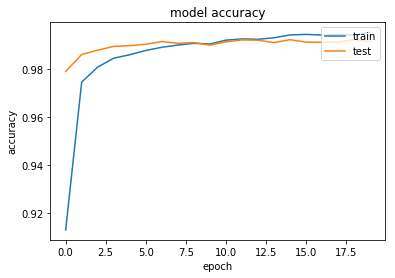

In [37]:
# Get Data
(X_train, Y_train), (X_test, Y_test) = fetch_preprocess_data()

# Create Model
model = create_model((1, 28, 28), 10)

# Train and evaluate. Obtain history
history = train_and_evaluate_model(model, X_train, Y_train, X_test, Y_test,
                                  20, 100)

# Plt progress
plot_model_progress(history)



